In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
#28x28 images are flatened and stored as an arrayof 784 pixel value

mnist.train.images.shape

(55000, 784)

In [14]:
mnist.train.images[0] # this is the flatened image of shape(784,) as real iamge is 28x28   

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
mnist.train.num_examples  #  .num_examples this the property to find the no. of examples

55000

In [17]:
mnist.test.images.shape

(10000, 784)

In [13]:
mnist.validation.images.shape

(5000, 784)

In [14]:
mnist.train.images[200].shape

(784,)

In [15]:
mnist.train.images[100].min()

0.0

In [18]:
mnist.train.images[100].max()

0.9960785

## Visulizing the Data

In [19]:
import matplotlib.pyplot as plt


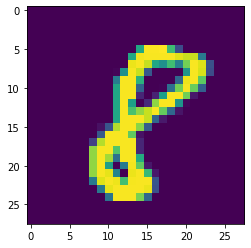

In [22]:
plt.imshow(mnist.train.images[7400].reshape(28,28))

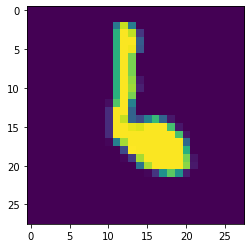

In [24]:
plt.imshow(mnist.train.images[600].reshape(28,28))

In [27]:
batch_x,batch_y = mnist.train.next_batch(200)

In [28]:
batch_x.shape

(200, 784)

In [29]:
batch_y.shape

(200, 10)

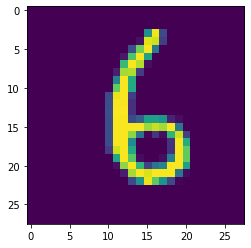

In [34]:
plt.imshow(batch_x[148].reshape(28,28))

In [30]:
batch_y[148]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [38]:
print(batch_y[148].argmax())  #Return indices of the maximum values along the given axis.

6


## Creating the Model

In [31]:
# placeholder to read and feed images at run time 
x= tf.placeholder(tf.float32,[None,784])  # 784 features

#placeholder to feed the label at the run time 
y_true =tf.placeholder(tf.float32,[None,10])   # As the it is labbeled in labelencoder(0-9)

In [32]:
#10 sets of 784 weights
W = tf.Variable(tf.zeros([784,10]))


In [33]:
# 10 bias  - one for each neuron

b = tf.Variable(tf.zeros([10]))

In [34]:
# Net input value and the activation function
I = tf.add(tf.matmul(x,W),b)

In [35]:
softmaxoutput = tf.nn.softmax(I)

### Loss and Optimizer

In [36]:
#define the cost /loss fns and the optimizer
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true,logits=softmaxoutput))

In [37]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train =optimizer.minimize(loss_function)

## Create Session

In [38]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

In [61]:
# training
for i in range(10000):
    batch_x,batch_y = mnist.train.next_batch(100)
    sess.run(train,feed_dict={x:batch_x,y_true:batch_y})

In [62]:
# infrence -predict
# execute the output in node in asession 

predict = sess.run(softmaxoutput,feed_dict={x:mnist.test.images})

In [63]:
predict

array([[4.4281778e-09, 4.2791029e-17, 1.8526162e-09, ..., 9.9999762e-01,
        5.8356897e-10, 4.9452712e-08],
       [3.8941512e-06, 2.1305803e-11, 9.9991500e-01, ..., 1.3372442e-21,
        3.2564122e-07, 5.5719051e-17],
       [1.5993094e-09, 9.9914074e-01, 6.0967822e-04, ..., 2.0754534e-05,
        1.1685271e-04, 3.5534501e-06],
       ...,
       [2.0376047e-13, 1.8192314e-12, 3.0604849e-11, ..., 9.7708448e-07,
        7.5692929e-05, 8.0365548e-04],
       [5.6861463e-06, 8.0045320e-06, 2.1144918e-07, ..., 2.6346196e-08,
        8.7986708e-01, 6.3276298e-07],
       [2.4500617e-09, 3.0265267e-19, 3.4992581e-07, ..., 1.5617315e-18,
        4.8848143e-12, 9.7539791e-15]], dtype=float32)

In [64]:
# argmax will the predicted value in terns of a number 
result = sess.run(tf.argmax(predict,axis=1))

In [65]:
result

array([7, 2, 1, ..., 4, 8, 6], dtype=int64)

In [66]:
result.shape

(10000,)

In [67]:
# same way the label value using the argmax
labhot = sess.run(tf.argmax(mnist.test.labels,axis=1))

In [68]:
labhot

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [69]:
accuracy_score(result,labhot)

0.9272

In [48]:
# run the inference of the model

In [49]:
# test with a single image
#fetch one image
test_image,test_label  = mnist.validation.next_batch(1)

In [50]:
#run refrence
mymax = tf.argmax(softmaxoutput,1)
print("Pridicted Value Is :")
print(sess.run(mymax,feed_dict={x:test_image}))

Pridicted Value Is :
[4]


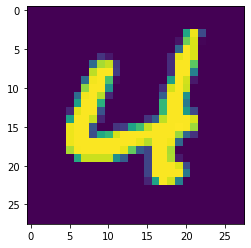

In [51]:
#display the image
plt.imshow(test_image.reshape(28,28))